# Analysis

In [177]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import numpy as np

# Load data
df_shuffle = pd.read_csv('../data/shuffle_playthrough.csv', index_col=0)
df_smart_shuffle = pd.read_csv('../data/smart_shuffle_playthrough.csv')
df_shuffle.head()

# Constants
PLAYLIST_SIZE = 1149
NUM_BINS = 30
sns.set_theme()

## Distributions

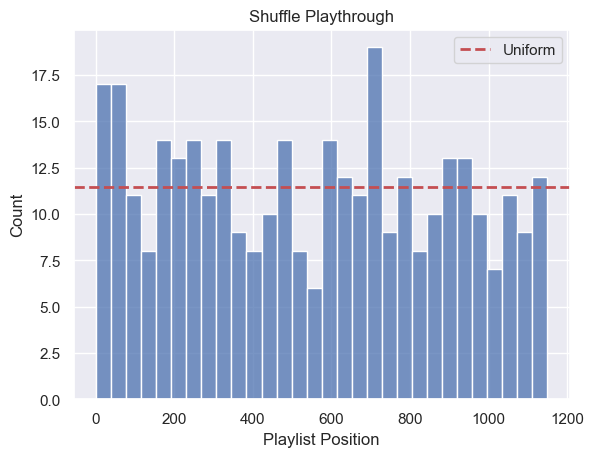

In [181]:
# Distribution of shuffle playthrough
freq_shuffle, bins_shuffle = np.histogram(df_shuffle['playlist_pos'], bins=NUM_BINS)
sns.histplot(df_shuffle, x='playlist_pos', bins=bins_shuffle)
plt.title('Shuffle Playthrough')
plt.xlabel('Playlist Position')
uniform_avg_shuffle = len(df_shuffle) / NUM_BINS
plt.axhline(y = uniform_avg_shuffle, color = 'r', lw=2, linestyle = '--', label='Uniform')
plt.legend()
plt.show()

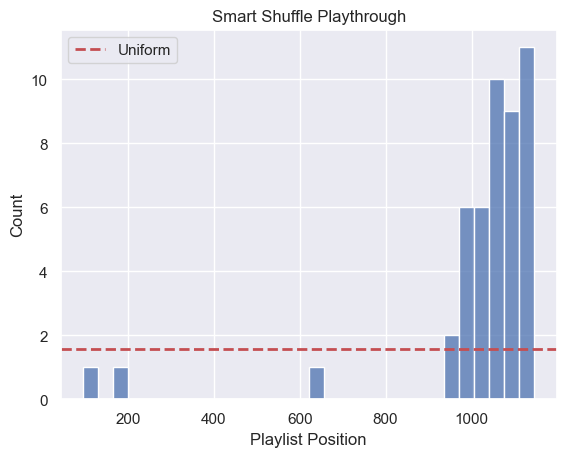

In [182]:
# Distribution of smart shuffle playthrough
freq_smart_shuffle, bins_smart_shuffle = np.histogram(df_smart_shuffle['playlist_pos'], bins=NUM_BINS)
sns.histplot(df_smart_shuffle, x='playlist_pos', bins=bins_smart_shuffle)
plt.title('Smart Shuffle Playthrough')
plt.xlabel('Playlist Position')
uniform_avg_smart_shuffle = len(df_smart_shuffle) / NUM_BINS
plt.axhline(y = uniform_avg_smart_shuffle, color = 'r', lw=2, linestyle = '--', label='Uniform')
plt.legend()
plt.show()

## Hypothesis Testing

In [186]:
expected_freq = [uniform_avg_shuffle for _ in range(NUM_BINS)]
chi2_stat, p_value = chisquare(freq_shuffle, f_exp=expected_freq)
print('Hypotheses\n----------')
print('H_0: Shuffle mode is (uniformly) random.')
print('H_A: Shuffle mode is not (uniformly) random.')
print(f'\np-value = {round(p_value, 4)}')
print("\nBecause our p-value is greater than any reasonable level of significance (e.g. 0.05), we fail to reject the null hypothesis.\n" + 
      "That is, we do not have sufficient evidence to conclude that Spotify's shuffle mode is not uniformly random.")

Hypotheses
----------
H_0: Shuffle mode is (uniformly) random.
H_A: Shuffle mode is not (uniformly) random.

p-value = 0.7016

Because our p-value is greater than any reasonable level of significance (e.g. 0.05), we fail to reject the null hypothesis.
That is, we do not have sufficient evidence to conclude that Spotify's shuffle mode is not uniformly random.


In [187]:
expected_freq = [uniform_avg_smart_shuffle for _ in range(NUM_BINS)]
chi2_stat, p_value = chisquare(freq_smart_shuffle, f_exp=expected_freq)
print('Hypotheses\n----------')
print('H_0: Smart shuffle mode is (uniformly) random.')
print('H_A: Smart shuffle mode is not (uniformly) random.')
print(f'\np-value = {round(p_value, 4)}')
print("\nBecause our p-value is less than any reasonable level of significance (e.g. 0.05), we reject the null hypothesis.\n" + 
      "That is, we have sufficient evidence to conclude that Spotify's smart shuffle mode is not uniformly random.")

Hypotheses
----------
H_0: Smart shuffle mode is (uniformly) random.
H_A: Smart shuffle mode is not (uniformly) random.

p-value = 0.0

Because our p-value is less than any reasonable level of significance (e.g. 0.05), we reject the null hypothesis.
That is, we have sufficient evidence to conclude that Spotify's smart shuffle mode is not uniformly random.
